<a href="https://colab.research.google.com/github/aneelabashir786/AI-ML-Tasks/blob/main/aneela_bashier_RNN_LSTM.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

INSTALLATION

In [ ]:
!pip install clean-text        # For cleaning and preprocessing text
!pip install Unidecode         # For converting Unicode text to ASCII
!pip install nltk              # Natural Language Toolkit - used for tokenization, stopwords, POS tagging, etc.
!pip install gensim keras      # Gensim: For Word2Vec embeddings; Keras: For building and training deep learning models (RNN, LSTM, etc.)


In [ ]:
import numpy as np                          # For numerical operations and arrays
import pandas as pd                         # For data manipulation and DataFrame handling
import matplotlib.pyplot as plt             # For visualizing data and model performance
from cleantext import clean                 # To clean and preprocess raw text (remove URLs, special chars, etc.)
import nltk                                 # Natural Language Toolkit for text processing
nltk.download('stopwords')                  # Download NLTK stopwords for filtering common words (e.g., "the", "is")

from nltk.corpus import stopwords           # Import stopwords list
from nltk.tokenize import word_tokenize     # For tokenizing text into words
from sklearn.feature_extraction.text import TfidfVectorizer # For TF-IDF text vectorization (classical ML)
from sklearn.model_selection import train_test_split
from gensim.models import Word2Vec                         # For training Word2Vec embeddings on your dataset
from keras.preprocessing.sequence import pad_sequences     # To pad input sequences to the same length (deep learning)
# Logistic Regression (classical ML model)
from sklearn.linear_model import LogisticRegression        # Logistic Regression model for classification
from sklearn.metrics import classification_report          # To print precision, recall, and F1-score

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


In [ ]:
nltk.download('punkt')                        # Pre-trained tokenizer for word/sentence tokenization
nltk.download('punkt_tab')                   # Internal helper file for 'punkt' (usually auto-installed with 'punkt')
nltk.download('averaged_perceptron_tagger')  # POS tagger needed for part-of-speech tagging
nltk.download('wordnet')                     # WordNet lexical database (used for lemmatization and synonym replacement)
nltk.download('omw-1.4')                     # Open Multilingual WordNet – supports multilingual WordNet and SynonymAug

[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package punkt_tab to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt_tab.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


True

1. Load the Dataset

In [ ]:
df = pd.read_csv("reddit_posts_and_comments.csv")

 Display the first few rows to understand the structure.

In [ ]:
df.head()

,post_title,post_text,subreddit,post_author,post_url,post_upvotes,post_downvotes,comment_upvotes,comment_downvotes,comment_text,comment_author
0,[D] - NeurIPS'2025 Reviews,"Hey everyone,\n\nNeurIPS 2025 reviews should b...",MachineLearning,Proof-Marsupial-5367,https://www.reddit.com/r/MachineLearning/comme...,203,0,77,0,Friendly reminder that reviews this year are s...,ChoiceStranger2898
1,[D] - NeurIPS'2025 Reviews,"Hey everyone,\n\nNeurIPS 2025 reviews should b...",MachineLearning,Proof-Marsupial-5367,https://www.reddit.com/r/MachineLearning/comme...,203,0,36,0,I had a dream recently where my upcoming avera...,popeldo
2,[D] - NeurIPS'2025 Reviews,"Hey everyone,\n\nNeurIPS 2025 reviews should b...",MachineLearning,Proof-Marsupial-5367,https://www.reddit.com/r/MachineLearning/comme...,203,0,63,0,I will treat the scores as a divine interventi...,matcha-coconut
3,[D] - NeurIPS'2025 Reviews,"Hey everyone,\n\nNeurIPS 2025 reviews should b...",MachineLearning,Proof-Marsupial-5367,https://www.reddit.com/r/MachineLearning/comme...,203,0,33,0,"July 24, so as long as it's July 24 somewhere ...",SmolLM
4,[D] - NeurIPS'2025 Reviews,"Hey everyone,\n\nNeurIPS 2025 reviews should b...",MachineLearning,Proof-Marsupial-5367,https://www.reddit.com/r/MachineLearning/comme...,203,0,34,0,"Well, if you feel heart-broken, be assured tha...",Marionberry6886


2. Select Relevant Columns. Keep only:

○ post_text

○ subreddit

In [ ]:
data =df[['post_text' , 'subreddit']]
data.to_csv('final_data.csv' , index=False)

In [ ]:
df1 = pd.read_csv('final_data.csv')
df1.head()

,post_text,subreddit
0,"Hey everyone,\n\nNeurIPS 2025 reviews should b...",MachineLearning
1,"Hey everyone,\n\nNeurIPS 2025 reviews should b...",MachineLearning
2,"Hey everyone,\n\nNeurIPS 2025 reviews should b...",MachineLearning
3,"Hey everyone,\n\nNeurIPS 2025 reviews should b...",MachineLearning
4,"Hey everyone,\n\nNeurIPS 2025 reviews should b...",MachineLearning


3. Select Subreddit Classes

● Filter the dataset to include only these three subreddit classes:

○ 'Alzheimers'
○ 'povertyfinance'
○ 'GetMotivated'

In [ ]:
selected_categories = ['Alzheimers' , 'povertyfinance' ,  'GetMotivated']
final_df = df1[df1['subreddit'].isin(selected_categories)]

In [ ]:
final_df.head()

,post_text,subreddit
1548,Two years ago I posted the following message o...,povertyfinance
1549,Two years ago I posted the following message o...,povertyfinance
1550,Two years ago I posted the following message o...,povertyfinance
1551,Two years ago I posted the following message o...,povertyfinance
1552,Two years ago I posted the following message o...,povertyfinance


4. Visualize Class Distribution

● Create a bar chart showing the number of posts in each selected subreddit using
matplotlib or seaborn

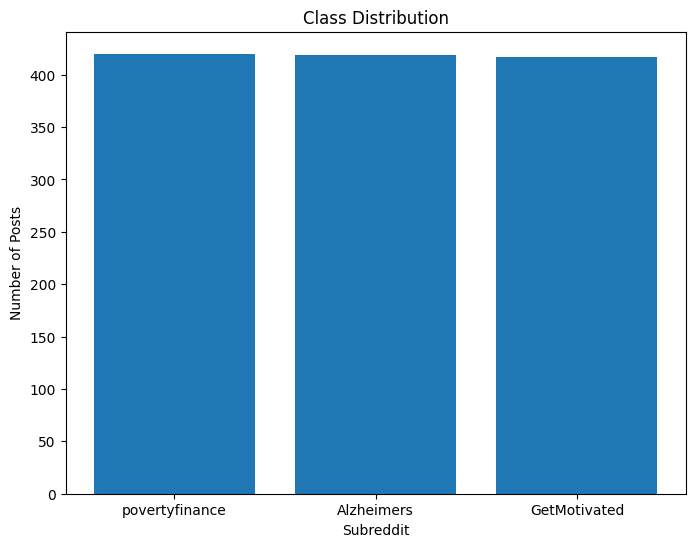

In [ ]:
plt.figure(figsize=(8, 6))
plt.bar(final_df['subreddit'].value_counts().index , final_df['subreddit'].value_counts().values)
plt.xlabel('Subreddit')
plt.ylabel('Number of Posts')
plt.title('Class Distribution')
plt.show()

5. Handle Null Values

● Drop or impute null values in both columns.

In [ ]:

null_post_text_df = final_df[final_df['post_text'].isnull()]
null_counts_by_subreddit = null_post_text_df['subreddit'].value_counts()
print(null_counts_by_subreddit)

subreddit
GetMotivated      92
povertyfinance    39
Alzheimers        15
Name: count, dtype: int64


In [ ]:
final_df['post_text'] = final_df['post_text'].fillna('unknown')
print(final_df.isnull().sum())

post_text    0
subreddit    0
dtype: int64


/tmp/ipython-input-3366353969.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  final_df['post_text'] = final_df['post_text'].fillna('unknown')


In [ ]:
final_df.head()

,post_text,subreddit
1548,Two years ago I posted the following message o...,povertyfinance
1549,Two years ago I posted the following message o...,povertyfinance
1550,Two years ago I posted the following message o...,povertyfinance
1551,Two years ago I posted the following message o...,povertyfinance
1552,Two years ago I posted the following message o...,povertyfinance


Text Preprocessing
6. Text Cleaning
Use the clean-text library to clean the post_text.

In [ ]:

print("Before:", final_df['post_text'].iloc[0])
final_df = final_df.copy()
final_df['post_text'] = final_df['post_text'].apply(lambda x: clean(
    x,
    lower=True,
    no_urls=True,
    no_emails=True,
    no_phone_numbers=True,
    no_digits=True,
    no_numbers=True,
    no_currency_symbols=True,
    no_punct=True,
    replace_with_punct="",
    replace_with_url="",
    replace_with_email="",
    replace_with_phone_number="",
    replace_with_digit="",
    replace_with_currency_symbol="",
    lang="en"
))
print("After:", final_df['post_text'].iloc[0])

Before: Two years ago I posted the following message on this subreddit due to an increase of shitty people who have not read the rules or the community guidelines: [https://www.reddit.com/r/povertyfinance/comments/11vwilh/special\_enforcement\_period/](https://www.reddit.com/r/povertyfinance/comments/11vwilh/special_enforcement_period/)



After a 6 month evaluation period, the determination was that these changes needed to become permanent.  



So here is how it is going to be. Any infraction can **will** incur a temp ban. This is to drive home the point that this shit isn't negotiable. Duration to be determined by the severity of the infraction, but ranging from 1 to 30 days.

A second offense of the same penalty, or getting numerous offenses across different rules will yield longer temp bans with every infraction. Users who demonstrate that their offenses are innate or deliberate, rather than accidental or incidental will get a full ban.

Particularly shitty people will get a 365 d

7. Remove Stopwords

● Use NLTK or spaCy to remove stopwords from the cleaned text

In [ ]:
final_df['post_text'] = final_df['post_text'].apply(lambda x: ' '.join([word for word in x.split() if len(word) > 2]))

stop_words = set(stopwords.words('english'))

def remove_stopwords(text):
    words = text.split()
    filtered_words = [word for word in words if word.lower() not in stop_words]
    return ' '.join(filtered_words)

final_df['post_text'] = final_df['post_text'].apply(remove_stopwords)


In [ ]:
final_df.head()

,post_text,subreddit
1548,two years ago posted following message subredd...,povertyfinance
1549,two years ago posted following message subredd...,povertyfinance
1550,two years ago posted following message subredd...,povertyfinance
1551,two years ago posted following message subredd...,povertyfinance
1552,two years ago posted following message subredd...,povertyfinance


Check Duplicates

In [ ]:

duplicate_count = final_df.duplicated(subset='post_text', keep=False).sum()
print("Total rows : " , final_df.shape[0])
print("Duplicates found:", duplicate_count)


Total rows :  1256
Duplicates found: 1251


In [ ]:
# 1. Install Required Libraries
# !pip install -q nlpaug

handle duplicates through augumentation

In [ ]:

# import pandas as pd
# import nlpaug.augmenter.word as naw
# import nltk

# # (Google Colab fix)
# def dummy_pos_tag(tokens):
#     return [(token, 'NN') for token in tokens]
# nltk.pos_tag = dummy_pos_tag


# final_df['post_text'] = final_df['post_text'].astype(str)

# print("Original dataset shape:", final_df.shape)

# duplicate_mask = final_df.duplicated(subset='post_text', keep=False)
# duplicates_df = final_df[duplicate_mask].copy()
# print("Duplicates found:", len(duplicates_df))

# # Keep one original and augment the rest
# aug = naw.SynonymAug(aug_src='wordnet')
# augmented_rows = []

# # Group duplicates by the text content
# grouped = duplicates_df.groupby('post_text')

# for text, group in grouped:
#     rows = group.copy()
#     original_row = rows.iloc[0]
#     augmented_rows.append(original_row)

#     # Augment rest of the duplicates
#     for i in range(1, len(rows)):
#         new_row = original_row.copy()
#         try:
#              new_row['post_text'] = aug.augment(text)
#         except:
#             new_row['post_text'] = text
#         augmented_rows.append(new_row)

# # Create augmented duplicate DataFrame
# augmented_df = pd.DataFrame(augmented_rows)

# # Drop old duplicates from original dataframe
# non_duplicates_df = final_df[~duplicate_mask]

# # Combine non-duplicates + augmented duplicates
# final_df1 = pd.concat([non_duplicates_df, augmented_df], ignore_index=True)
# print("Final dataset shape after augmentation:", final_df1.shape)

# final_df1.to_csv("augmented_dataset.csv", index=False)


In [ ]:

# duplicate_count = final_df1.duplicated(subset='post_text', keep=False).sum()
# print("Duplicates found:", duplicate_count)

# final_df1 = final_df1[~final_df1.duplicated(subset='post_text', keep=False)]

# # Verify removal (optional)
# print("Remaining rows:", len(final_df1))

8. Tokenization

● Split the cleaned text into tokens (words)

In [ ]:

final_df['post_text'] = final_df['post_text'].astype(str)
final_df['post_text'] = final_df['post_text'].apply(word_tokenize)
print(final_df.head())

                                              post_text       subreddit
1548  [two, years, ago, posted, following, message, ...  povertyfinance
1549  [two, years, ago, posted, following, message, ...  povertyfinance
1550  [two, years, ago, posted, following, message, ...  povertyfinance
1551  [two, years, ago, posted, following, message, ...  povertyfinance
1552  [two, years, ago, posted, following, message, ...  povertyfinance


Label Encoding

9. Encode Target Labels

In [ ]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
final_df['subreddit'] = le.fit_transform(final_df['subreddit'])
print(final_df.head())

                                              post_text  subreddit
1548  [two, years, ago, posted, following, message, ...          2
1549  [two, years, ago, posted, following, message, ...          2
1550  [two, years, ago, posted, following, message, ...          2
1551  [two, years, ago, posted, following, message, ...          2
1552  [two, years, ago, posted, following, message, ...          2


11. Split the Dataset

● Use train_test_split to divide data into training and test sets (80/20 split)

In [ ]:
X = final_df['post_text']
y = final_df['subreddit']

X_train, X_test, y_train, y_test = train_test_split( X, y, test_size=0.2, random_state=42, stratify=y)

Vectorization
10. Use Two Vectorization Techniques

(a) TF-IDF (for classical models)

● Vectorize the text using TfidfVectorizer for comparison or baseline modeling.


In [ ]:
temp_text = final_df['post_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

vectorizer = TfidfVectorizer()
x = vectorizer.fit_transform(temp_text)

feature_names = vectorizer.get_feature_names_out()

print("Feature Names:", feature_names)
print("TF-IDF Matrix Shape:", x.shape)

Feature Names: ['aaju' 'aaro' 'abbreviated' ... 'zero' 'zombie' 'zone']
TF-IDF Matrix Shape: (1256, 5622)


(b) Word2Vec

● Train a Word2Vec model using gensim on the tokenized text.

● Build a word index and an embedding matrix.

● Convert each post into a sequence of integers using the word index.

● Use pad_sequences from Keras to ensure uniform input length.

In [ ]:

tokenized_posts = final_df['post_text'].apply(lambda x: x.split() if isinstance(x, str) else x)

w2v_model = Word2Vec(sentences=tokenized_posts, vector_size=100, window=5, min_count=1, workers=4)
# Create a word-to-index dictionary
word_index = {word: i + 1 for i, word in enumerate(w2v_model.wv.index_to_key)}

embedding_dim = w2v_model.vector_size
vocab_size = len(word_index) + 1

embedding_matrix = np.zeros((vocab_size, embedding_dim))

# Fill embedding matrix
for word, i in word_index.items():
    embedding_matrix[i] = w2v_model.wv[word]

# Convert each tokenized post into a list of indices
post_sequences = tokenized_posts.apply(lambda tokens: [word_index.get(word, 0) for word in tokens])

max_len = 100

padded_sequences = pad_sequences(post_sequences, maxlen=max_len, padding='post', truncating='post')

print("Word Index:", word_index)
print("Embedding Matrix Shape:", embedding_matrix.shape)
print("Padded Sequences Shape:", padded_sequences.shape)

Word Index: {'number': 1, '<': 2, '>': 3, 'like': 4, 'dont': 5, 'get': 6, 'time': 7, 'know': 8, 'even': 9, 'work': 10, 'one': 11, 'ive': 12, 'feel': 13, 'would': 14, 'day': 15, 'help': 16, 'want': 17, 'mom': 18, 'really': 19, 'life': 20, 'home': 21, 'years': 22, 'still': 23, 'much': 24, 'need': 25, 'things': 26, 'cant': 27, 'people': 28, 'make': 29, 'going': 30, 'also': 31, 'alzheimers': 32, 'care': 33, 'back': 34, 'something': 35, 'anyone': 36, 'family': 37, 'thats': 38, 'got': 39, 'dad': 40, 'think': 41, 'shes': 42, 'every': 43, 'last': 44, 'job': 45, 'month': 46, 'said': 47, 'money': 48, 'days': 49, 'live': 50, 'week': 51, 'doesnt': 52, 'could': 53, 'year': 54, 'right': 55, 'car': 56, 'always': 57, 'take': 58, 'getting': 59, 'keep': 60, 'thing': 61, 'better': 62, 'good': 63, 'way': 64, 'hard': 65, 'well': 66, 'trying': 67, 'bad': 68, 'never': 69, 'hours': 70, 'everything': 71, 'anything': 72, 'made': 73, 'didnt': 74, 'hes': 75, 'try': 76, 'advice': 77, 'start': 78, 'memory': 79, 'en

12. Build and Train the Models

Train Logistic Regression using TF-IDF.

In [ ]:

text_data = final_df['post_text'].apply(lambda x: ' '.join(x) if isinstance(x, list) else x)

X= text_data
y = final_df['subreddit']

# TF-IDF vectorization
tfidf = TfidfVectorizer(max_features=5000, stop_words='english')
X_train_tfidf = tfidf.fit_transform(X)
# X_test_tfidf = tfidf.transform(X_test_text)

# Train-test split for Logistic Regression pipeline
X_train, X_test, y_train, y_test = train_test_split(
    X_train_tfidf, y, test_size=0.2, random_state=42 , stratify=y)

# Train logistic regression
lr_model = LogisticRegression(max_iter=1000)
lr_model.fit(X_train, y_train)

y_pred = lr_model.predict(X_test)
print(classification_report(y_test, y_pred))


              precision    recall  f1-score   support

           0       1.00      0.95      0.98        84
           1       0.83      1.00      0.91        84
           2       1.00      0.85      0.92        84

    accuracy                           0.93       252
   macro avg       0.94      0.93      0.93       252
weighted avg       0.94      0.93      0.93       252



Train two separate models using Keras:

(a) RNN

● Architecture:

○ Embedding layer (pre-trained with Word2Vec)

○ SimpleRNN layer

○ Dense output layer with softmax

(b) LSTM

● Architecture:

○ Embedding layer (pre-trained with Word2Vec)

○ LSTM layer

Dense output layer with softmax

Use:

● Loss function
● Optimizer
● Metrics

Train your RNN and LSTM models with EarlyStopping to prevent overfitting and reduce unnecessary epochs.

RNN model with simpleRNN

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense


final_df = final_df.dropna(subset=['post_text', 'subreddit'])
texts = final_df['post_text'].astype(str).tolist()
labels = final_df['subreddit'].tolist()

tokenizer = Tokenizer()
tokenizer.fit_on_texts(texts)
sequences = tokenizer.texts_to_sequences(texts)
word_index = tokenizer.word_index
max_len = 100
X = pad_sequences(sequences, maxlen=max_len)

w2v_model = Word2Vec(sentences=[text.split() for text in texts],
                     vector_size=100, window=5, min_count=1)

embedding_dim = 100
embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
for word, i in word_index.items():
    if word in w2v_model.wv:
        embedding_matrix[i] = w2v_model.wv[word]

le = LabelEncoder()
y = le.fit_transform(labels)
y = to_categorical(y)

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

model = Sequential()
model.add(Embedding(input_dim=embedding_matrix.shape[0],
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_len,
                    trainable=True))
model.add(SimpleRNN(64))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

model.fit(X_train, y_train, validation_data=(X_test, y_test),
          epochs=10, batch_size=32)

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


Epoch 1/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 9s 68ms/step - accuracy: 0.6182 - loss: 0.8153 - val_accuracy: 0.9325 - val_loss: 0.2317
Epoch 2/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 36ms/step - accuracy: 0.9386 - loss: 0.2006 - val_accuracy: 0.9365 - val_loss: 0.1538
Epoch 3/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 35ms/step - accuracy: 0.9387 - loss: 0.1473 - val_accuracy: 0.9683 - val_loss: 0.1329
Epoch 4/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9390 - loss: 0.1353 - val_accuracy: 0.9405 - val_loss: 0.1370
Epoch 5/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9470 - loss: 0.1287 - val_accuracy: 0.9444 - val_loss: 0.1355
Epoch 6/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 1s 33ms/step - accuracy: 0.9620 - loss: 0.1033 - val_accuracy: 0.9524 - val_loss: 0.1419
Epoch 7/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.9607 - loss: 0.1097 - val_accuracy: 0.9444 - val_loss: 0.1384
Epoch 8/10
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 53ms/step - accuracy: 0.9469 - loss: 0.1251 - val_accuracy: 0.9524 - v

LSTM model

In [ ]:
# from tensorflow.keras.preprocessing.sequence import pad_sequences
# from sklearn.model_selection import train_test_split
# from sklearn.preprocessing import LabelEncoder
# from tensorflow.keras.utils import to_categorical
# from tensorflow.keras.models import Sequential
# from tensorflow.keras.layers import Embedding, LSTM, Dense
# from tensorflow.keras.callbacks import EarlyStopping

# final_df = final_df.dropna(subset=['post_text', 'subreddit'])
# texts = final_df['post_text'].astype(str).tolist()
# labels = final_df['subreddit'].tolist()


# tokenizer = Tokenizer()
# tokenizer.fit_on_texts(texts)
# sequences = tokenizer.texts_to_sequences(texts)
# word_index = tokenizer.word_index
# max_len = 100
# X = pad_sequences(sequences, maxlen=max_len)


# w2v_model = Word2Vec(sentences=[text.split() for text in texts],
#                      vector_size=100, window=5, min_count=1)


# embedding_dim = 100
# embedding_matrix = np.zeros((len(word_index) + 1, embedding_dim))
# for word, i in word_index.items():
#     if word in w2v_model.wv:
#         embedding_matrix[i] = w2v_model.wv[word]


# le = LabelEncoder()
# y = le.fit_transform(labels)
# y = to_categorical(y)


# X_train, X_test, y_train, y_test = train_test_split(
#     X, y, test_size=0.2, random_state=42, stratify=y)

# model = Sequential()
# model.add(Embedding(input_dim=embedding_matrix.shape[0],
#                     output_dim=embedding_dim,
#                     weights=[embedding_matrix],
#                     input_length=max_len,
#                     trainable=True))
# model.add(LSTM(64, return_sequences=False))
# model.add(Dense(y.shape[1], activation='softmax'))

# model.compile(loss='categorical_crossentropy',
#               optimizer='adam',
#               metrics=['accuracy'])


# early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)

# model.fit(X_train, y_train,
#           validation_data=(X_test, y_test),
#           epochs=20,
#           batch_size=32,
#           callbacks=[early_stop])

# loss, accuracy = model.evaluate(X_test, y_test)
# print("Test Accuracy:", accuracy)



import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, LSTM, Dense
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.preprocessing.sequence import pad_sequences
from gensim.models import Word2Vec
import joblib

final_df = final_df.dropna(subset=['post_text', 'subreddit'])
texts = final_df['post_text'].astype(str).tolist()
labels = final_df['subreddit'].tolist()

tokenized_posts = [text.split() for text in texts]


w2v_model = Word2Vec(sentences=tokenized_posts, vector_size=100, window=5, min_count=1, workers=4)


word_index = {word: idx + 1 for idx, word in enumerate(w2v_model.wv.index_to_key)}  # 0 reserved for padding
vocab_size = len(word_index) + 1
embedding_dim = w2v_model.vector_size


embedding_matrix = np.zeros((vocab_size, embedding_dim))
for word, i in word_index.items():
    embedding_matrix[i] = w2v_model.wv[word]

sequences = [[word_index.get(word, 0) for word in post] for post in tokenized_posts]
max_len = 100
X = pad_sequences(sequences, maxlen=max_len, padding='post', truncating='post')

le = LabelEncoder()
y_encoded = le.fit_transform(labels)
y = to_categorical(y_encoded)


X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y)

model = Sequential()
model.add(Embedding(input_dim=vocab_size,
                    output_dim=embedding_dim,
                    weights=[embedding_matrix],
                    input_length=max_len,
                    trainable=True))
model.add(LSTM(64))
model.add(Dense(y.shape[1], activation='softmax'))

model.compile(loss='categorical_crossentropy', optimizer='adam', metrics=['accuracy'])

early_stop = EarlyStopping(monitor='val_loss', patience=3, restore_best_weights=True)


model.fit(X_train, y_train,
          validation_data=(X_test, y_test),
          epochs=20,
          batch_size=32,
          callbacks=[early_stop])

loss, accuracy = model.evaluate(X_test, y_test)
print("Test Accuracy:", accuracy)


model.save("lstm_model.h5")
joblib.dump(word_index, "word_index.pkl")
joblib.dump(le, "label_encoder.pkl")

print(" Model, word_index, and label encoder saved!")


Epoch 1/20


/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:97: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


32/32 ━━━━━━━━━━━━━━━━━━━━ 6s 75ms/step - accuracy: 0.3982 - loss: 1.0919 - val_accuracy: 0.4365 - val_loss: 1.0785
Epoch 2/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 62ms/step - accuracy: 0.4369 - loss: 1.0602 - val_accuracy: 0.4722 - val_loss: 1.0317
Epoch 3/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.4928 - loss: 0.9800 - val_accuracy: 0.5833 - val_loss: 0.8842
Epoch 4/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 63ms/step - accuracy: 0.5763 - loss: 0.8468 - val_accuracy: 0.7024 - val_loss: 0.7287
Epoch 5/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 96ms/step - accuracy: 0.6636 - loss: 0.7323 - val_accuracy: 0.6905 - val_loss: 0.7403
Epoch 6/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 67ms/step - accuracy: 0.6951 - loss: 0.7356 - val_accuracy: 0.6746 - val_loss: 0.7273
Epoch 7/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 2s 64ms/step - accuracy: 0.7282 - loss: 0.6324 - val_accuracy: 0.7262 - val_loss: 0.5882
Epoch 8/20
32/32 ━━━━━━━━━━━━━━━━━━━━ 3s 67ms/step - accuracy: 0.7305 - loss: 0.5038 - val_accuracy: 0.7619 - val_loss: 0.

Test Accuracy: 0.8690476417541504
 Model, word_index, and label encoder saved!


Model Evaluation

13. Evaluate Performance

● Generate and display:

○ Classification Report (Precision, Recall, F1-Score)

○ Confusion Matrix

8/8 ━━━━━━━━━━━━━━━━━━━━ 0s 41ms/step
Classification Report:
              precision    recall  f1-score   support

           0       1.00      0.93      0.96        84
           1       0.72      1.00      0.84        84
           2       1.00      0.68      0.81        84

    accuracy                           0.87       252
   macro avg       0.91      0.87      0.87       252
weighted avg       0.91      0.87      0.87       252



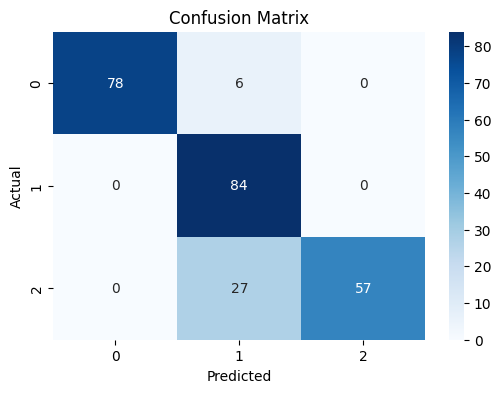

In [ ]:

from sklearn.metrics import classification_report, confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns


y_pred = model.predict(X_test)

import numpy as np
if y_pred.ndim > 1 and y_pred.shape[1] > 1:
    y_pred_classes = np.argmax(y_pred, axis=1)
else:
    y_pred_classes = (y_pred > 0.5).astype(int)

if y_test.ndim > 1 and y_test.shape[1] > 1:
    y_true = np.argmax(y_test, axis=1)
else:
    y_true = y_test

print("Classification Report:")
print(classification_report(y_true, y_pred_classes))

cm = confusion_matrix(y_true, y_pred_classes)
plt.figure(figsize=(6, 4))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.title('Confusion Matrix')
plt.show()


Build a Streamlit App
14. Create an Interactive Interface

Build a Streamlit web app to:

● Display a sample of the dataset

● Visualize class distribution

● Explain your preprocessing pipeline

● Allow user to input a Reddit post and predict its subreddit

● Show model performance metrics

In [ ]:
import gradio as gr
import numpy as np
import joblib
import tensorflow as tf
from tensorflow.keras.models import load_model
from tensorflow.keras.preprocessing.sequence import pad_sequences

model = load_model("lstm_model.h5")
word_index = joblib.load("word_index.pkl")
label_encoder = joblib.load("label_encoder.pkl")


max_len = 100

def predict_subreddit(text):
    if not text.strip():
        return "Please enter a valid post.", None

    words = text.lower().split()
    sequence = [word_index.get(word, 0) for word in words]
    padded_sequence = pad_sequences([sequence], maxlen=max_len, padding='post', truncating='post')


    preds = model.predict(padded_sequence)[0]
    predicted_index = np.argmax(preds)
    predicted_label = label_encoder.inverse_transform([predicted_index])[0]
    confidence = preds[predicted_index] * 100

    return f"Predicted Subreddit: {predicted_label} ({confidence:.2f}% confidence)"

interface = gr.Interface(
    fn=predict_subreddit,
    inputs=gr.Textbox(lines=4, placeholder="Enter a Reddit post here..."),
    outputs="text",
    title="Subreddit Classifier (LSTM + Word2Vec)",
    description="Enter a Reddit post and get the predicted subreddit using an LSTM model trained with Word2Vec."
)

interface.launch(debug=True)


It looks like you are running Gradio on a hosted Jupyter notebook, which requires `share=True`. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
* Running on public URL: https://bd0e35f8afe28586da.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
